In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)
df_city2 = df_city
# Combine the data into a single dataset
city_ride = pd.merge(df_ride,df_city, how="left", on=["city", "city"])

# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# Obtain the x and y coordinates for each of the three city types
#Urban Group
#-----------
urban_grp = city_ride[city_ride['type']=='Urban'].groupby(['city'])
#Number of rides per city type 'Urban'
rides_per_city_urban = urban_grp['ride_id'].count()
#Average rides per city type 'Urban'
avgfare_urban = urban_grp['fare'].mean()
#Average Driver count per city type 'Urban'
driver_cnt_urban = urban_grp['driver_count'].mean()

#Rural group
#-----------
rural_grp = city_ride[city_ride['type']=='Rural'].groupby(['city'])
#Number of rides per city type 'Rural'
rides_per_city_rural = rural_grp['ride_id'].count()
#Average rides per city type 'Rural'
avgfare_rural = rural_grp['fare'].mean()
#Average Driver count per city type 'Rural'
driver_cnt_rural = rural_grp['driver_count'].mean()

#SubUrban Group
suburban_grp = city_ride[city_ride['type']=='Suburban'].groupby(['city'])
#Number of rides per city type 'Suburban'
rides_per_city_suburban = suburban_grp['ride_id'].count()
#Average rides per city type 'Suburban'
avgfare_suburban = suburban_grp['fare'].mean()
#Average Driver count per city type 'Suburban'
driver_cnt_suburban = suburban_grp['driver_count'].mean()

          

## Bubble Plot of Ride Sharing Data

Text(42, 35, 'Circle size correlates with driver count per city')

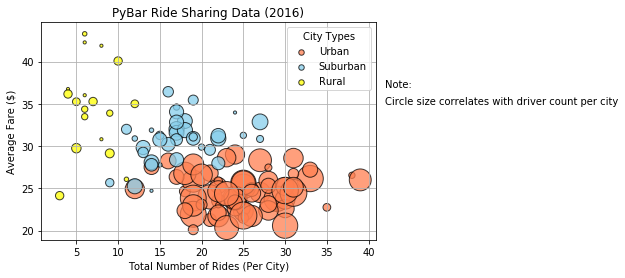

In [3]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

plt.scatter(rides_per_city_urban,avgfare_urban,marker="o", facecolors="Coral", edgecolors="black",
            s=driver_cnt_urban*10, alpha=0.75,label='Urban')
plt.scatter(rides_per_city_suburban,avgfare_suburban,marker="o", facecolors="SkyBlue", edgecolors="black",
            s=driver_cnt_suburban*10, alpha=0.75,label='Suburban')
plt.scatter(rides_per_city_rural,avgfare_rural,marker="o", facecolors="Yellow", edgecolors="black",
            s=driver_cnt_rural*10, alpha=0.75,label='Rural')


# Incorporate the other graph properties
plt.grid()
# Create a legend
plt.title("PyBar Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
lgnd = plt.legend(title="City Types",fancybox=True)
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
plt.text(42,37,"Note:")
plt.text(42,35,"Circle size correlates with driver count per city")

# Save Figure


## Total Fares by City Type

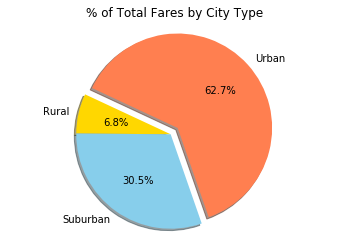

In [11]:
# Calculate Type Percents
#Group all merged data by 'Type'
city_ride_type = city_ride.groupby('type')
#Get the sum of all the columns
fare_sum_type = city_ride_type.sum()
#This list is to store the Type of the city
list_fare_type = []
#This list is to store the % of Total fares
list_fares = []

#Store the index into the Type of the city list
for fare_type in fare_sum_type.index:
    list_fare_type.append(fare_type)

#Store the index into the Type of the city list
for fare,ride_id in fare_sum_type.iterrows():
    list_fares.append(ride_id['fare'])

colors = ['Gold','SkyBlue','Coral']
explode1 = (0, 0, 0.1)

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(list_fares, explode=explode1,labels=list_fare_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=155)
plt.axis("equal")

# Save Figure
plt.savefig("Images/Fares.png")


In [149]:
# Show Figure
plt.show()

## Total Rides by City Type

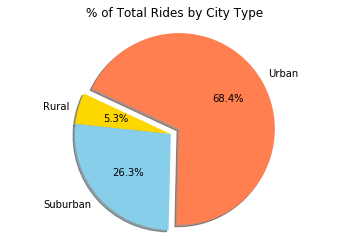

In [15]:
# Calculate Ride Percents
# Build Pie Chart
fare_ride_cnt = city_ride_type.count()

#This list is to store the Type of the ride
list_ride_type = []
#This list is to store the % of rides
list_ride_pct = []

#Store the index into the Type of the ride list
for fare_type in fare_ride_cnt.index:
    list_ride_type.append(fare_type)

#Store the index Total rides for each type Type of the city list
for ride,ride_id in fare_ride_cnt.iterrows():
    #list_ride_pct.append((ride_id['ride_id']/total_rides)*100)
    list_ride_pct.append(ride_id['ride_id'])


colors = ['Gold','SkyBlue','Coral']
explode1 = (0, 0, 0.1)

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(list_ride_pct, explode=explode1,labels=list_ride_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=155)
plt.axis("equal")

# Save Figure
plt.savefig("Images/Rides.png")


## Total Drivers by City Type

In [25]:
# Calculate Driver Percents
city_type_drivers = df_city2.groupby('type')
city_driver_cnt = city_type_drivers.sum()

[driver_count    78
 Name: Rural, dtype: int64, driver_count    490
 Name: Suburban, dtype: int64, driver_count    2405
 Name: Urban, dtype: int64]

C:\Users\aarth\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


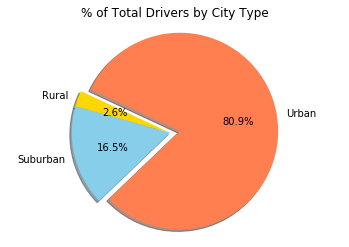

In [30]:
# Build Pie Chart

# Labels for the sections of our pie chart
driver_labels = []
for labels in city_driver_cnt.index:
    driver_labels.append(labels)

# The values of each section of the pie chart
driver_count = []
for drivers in city_driver_cnt.iterrows():
    driver_count.append(drivers[-1])


# The colors of each section of the pie chart
driver_color = ["Gold", "SkyBlue", "Coral"]

# Tells matplotlib to seperate the "Urban" section from the others
driver_explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above

plt.title("% of Total Drivers by City Type")
plt.pie(driver_count, explode=driver_explode, labels=driver_labels, colors=driver_color, autopct="%1.1f%%", shadow=True, startangle=155)
plt.axis("equal")

# Save Figure

plt.savefig("Images/Drivers.png")
plt.show()
